# Traffic Signs Recognition

## Aim: In this Python project, we will build a deep neural network model that can classify traffic signs present in the image into different categories. With this model, we are able to read and understand traffic signs which are a very important task for all autonomous vehicles.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import keras_tuner as Keras_Tuner 


In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

In [3]:
#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [4]:
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [5]:
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [6]:
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
#Converting the labels into one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [9]:
# #Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

In [10]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [11]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 59s 59ms/step - loss: 1.9096 - accuracy: 0.5138 - val_loss: 0.4793 - val_accuracy: 0.8799
Epoch 2/15
981/981 [==============================] - 60s 61ms/step - loss: 0.5896 - accuracy: 0.8303 - val_loss: 0.1606 - val_accuracy: 0.9566
Epoch 3/15
981/981 [==============================] - 61s 62ms/step - loss: 0.3824 - accuracy: 0.8925 - val_loss: 0.1352 - val_accuracy: 0.9648
Epoch 4/15
981/981 [==============================] - 58s 59ms/step - loss: 0.2847 - accuracy: 0.9207 - val_loss: 0.1156 - val_accuracy: 0.9690
Epoch 5/15
981/981 [==============================] - 58s 59ms/step - loss: 0.2369 - accuracy: 0.9333 - val_loss: 0.0899 - val_accuracy: 0.9773
Epoch 6/15
981/981 [==============================] - 57s 58ms/step - loss: 0.2320 - accuracy: 0.9397 - val_loss: 0.0781 - val_accuracy: 0.9778
Epoch 7/15
981/981 [==============================] - 61s 62ms/step - loss: 0.2158 - accuracy: 0.9430 - val_loss: 0.0951 - val_accuracy:

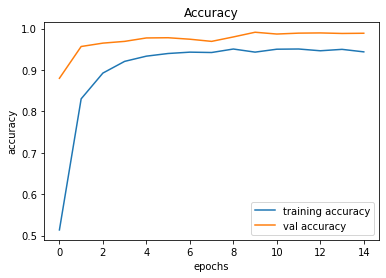

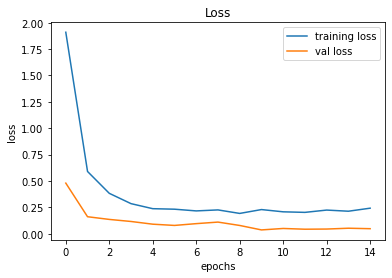

In [12]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [13]:
# Hyperparameters Tune the Model
!pip install -q -U keras-tuner

In [14]:
from sklearn.metrics import r2_score

pre_1 = model.predict(X_test)

In [15]:
print(np.round(r2_score(y_test,pre_1)*100,0))

98.0


In [72]:

import keras_tuner as Keras_Tuner 

# Filter = 
# Kernal_Size = 


def Tuning_Model_build(hp):
    Tuning_Model = Sequential()
    Tuning_Model.add(Conv2D(filters=hp.Int("Filter_Size" , min_value=32,max_value=128,step=32),kernel_size=hp.Choice('Kernal' , values=[3,5]),activation='relu',input_shape=(30,30,3)))
    Tuning_Model.add(Conv2D(filters=hp.Int("Filter_Size1" , min_value=32,max_value=128,step=32),kernel_size=hp.Choice('Kernal1' , values=[3,5]),activation='relu'))
    Tuning_Model.add(MaxPool2D())
    Tuning_Model.add(Dropout(rate=0.25))
    Tuning_Model.add(Conv2D(filters=hp.Int("Filter_Size2" , min_value=32,max_value=64,step=32),kernel_size=hp.Choice('Kernal2' , values=[3,5]),activation='relu'))
    Tuning_Model.add(Conv2D(filters=hp.Int("Filter_Size3" , min_value=32,max_value=64,step=32),kernel_size=hp.Choice('Kernal3' , values=[3,5]),activation='relu'))
    Tuning_Model.add(MaxPool2D())
    Tuning_Model.add(Dropout(rate=0.25))
    Tuning_Model.add(Flatten())
    Tuning_Model.add(Dense(units=hp.Int('dense_1_units', min_value=32, max_value=128),activation='relu'))
    Tuning_Model.add(Dropout(rate=0.25))
    Tuning_Model.add(Dense(43,activation='softmax'))
    Tuning_Model.compile(optimizer='adam',
                        loss='categorical_crossentropy',
              metrics=['accuracy'])
    return Tuning_Model

In [73]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [74]:
Tuner_Search = RandomSearch(Tuning_Model_build,objective='val_accuracy',max_trials=5,directory='output',project_name="Traffic_Sign",executions_per_trial=3,overwrite=True)

In [75]:
Tuner_Search.search(X_train,y_train,epochs=15,validation_data=(X_test,y_test))

Trial 5 Complete [01h 18m 41s]
val_accuracy: 0.3707387646039327

Best val_accuracy So Far: 0.993028998374939
Total elapsed time: 06h 26m 40s
INFO:tensorflow:Oracle triggered exit


In [76]:
model=Tuner_Search.get_best_models(num_models=1)[0]

In [77]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 96)        2688      
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 96)        83040     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 96)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 96)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          153664    
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

In [82]:
Tuner_Search.results_summary()

Results summary
Results in output\Traffic_Sign
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
Filter_Size: 96
Kernal: 3
Filter_Size1: 96
Kernal1: 3
Filter_Size2: 64
Kernal2: 5
Filter_Size3: 64
Kernal3: 3
dense_1_units: 127
Score: 0.993028998374939
Trial summary
Hyperparameters:
Filter_Size: 32
Kernal: 3
Filter_Size1: 96
Kernal1: 5
Filter_Size2: 32
Kernal2: 5
Filter_Size3: 32
Kernal3: 5
dense_1_units: 91
Score: 0.9892459511756897
Trial summary
Hyperparameters:
Filter_Size: 96
Kernal: 3
Filter_Size1: 64
Kernal1: 5
Filter_Size2: 64
Kernal2: 3
Filter_Size3: 64
Kernal3: 3
dense_1_units: 49
Score: 0.6781858478983244
Trial summary
Hyperparameters:
Filter_Size: 64
Kernal: 5
Filter_Size1: 128
Kernal1: 3
Filter_Size2: 64
Kernal2: 5
Filter_Size3: 32
Kernal3: 3
dense_1_units: 101
Score: 0.3707387646039327
Trial summary
Hyperparameters:
Filter_Size: 64
Kernal: 5
Filter_Size1: 32
Kernal1: 3
Filter_Size2: 64
Kernal2: 3
Filter_Size3: 32
Kernal3: 5

In [85]:
Tuned_Model = Sequential()
Tuned_Model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu', input_shape=X_train.shape[1:]))
Tuned_Model.add(Conv2D(filters=96, kernel_size=(3,3), activation='relu'))
Tuned_Model.add(MaxPool2D())
Tuned_Model.add(Dropout(rate=0.25))
Tuned_Model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
Tuned_Model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
Tuned_Model.add(MaxPool2D())
Tuned_Model.add(Dropout(rate=0.25))
Tuned_Model.add(Flatten())
Tuned_Model.add(Dense(127, activation='relu'))
Tuned_Model.add(Dropout(rate=0.5))
Tuned_Model.add(Dense(43, activation='softmax'))

In [86]:
Tuned_Model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [87]:
epochs = 15
history = Tuned_Model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
981/981 [==============================] - 103s 105ms/step - loss: 2.1451 - accuracy: 0.4593 - val_loss: 0.4006 - val_accuracy: 0.9002
Epoch 2/15
981/981 [==============================] - 103s 105ms/step - loss: 0.4995 - accuracy: 0.8628 - val_loss: 0.1571 - val_accuracy: 0.9661
Epoch 3/15
981/981 [==============================] - 104s 106ms/step - loss: 0.3142 - accuracy: 0.9164 - val_loss: 0.0740 - val_accuracy: 0.9823
Epoch 4/15
981/981 [==============================] - 103s 105ms/step - loss: 0.2326 - accuracy: 0.9382 - val_loss: 0.0784 - val_accuracy: 0.9807
Epoch 5/15
981/981 [==============================] - 104s 106ms/step - loss: 0.2341 - accuracy: 0.9394 - val_loss: 0.0650 - val_accuracy: 0.9833
Epoch 6/15
981/981 [==============================] - 104s 106ms/step - loss: 0.1893 - accuracy: 0.9508 - val_loss: 0.0648 - val_accuracy: 0.9843
Epoch 7/15
981/981 [==============================] - 103s 105ms/step - loss: 0.1662 - accuracy: 0.9563 - val_loss: 0.0485 -

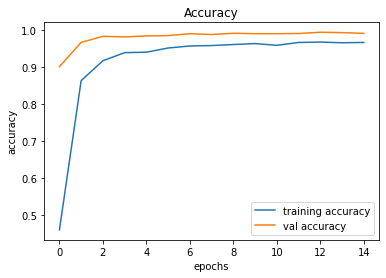

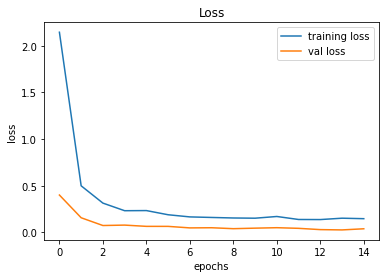

In [88]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [89]:

pred = Tuned_Model.predict(X_test)

from sklearn.metrics import r2_score

print(np.round(r2_score(y_test,pred)*100,0))

98.0


### Cross Validation Model